In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

import re
import string
from collections import Counter
from nltk.corpus import stopwords
stop = stopwords.words('english')
!pip install chart_studio
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from chart_studio import plotly as py

init_notebook_mode(connected=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [12]:
emails = pd.read_csv('emails.csv')
questions = pd.read_csv('questions.csv')
professionals = pd.read_csv('professionals.csv')
comments = pd.read_csv('comments.csv')
tag_users = pd.read_csv('tag_users.csv')
group_memberships = pd.read_csv('group_memberships.csv')
tags = pd.read_csv('tags.csv')
students = pd.read_csv('students.csv')
groups = pd.read_csv('groups.csv')
tag_questions = pd.read_csv('tag_questions.csv')
matches = pd.read_csv('matches.csv')
answers = pd.read_csv('answers.csv')
school_memberships = pd.read_csv('school_memberships.csv')

## Top 20 locations

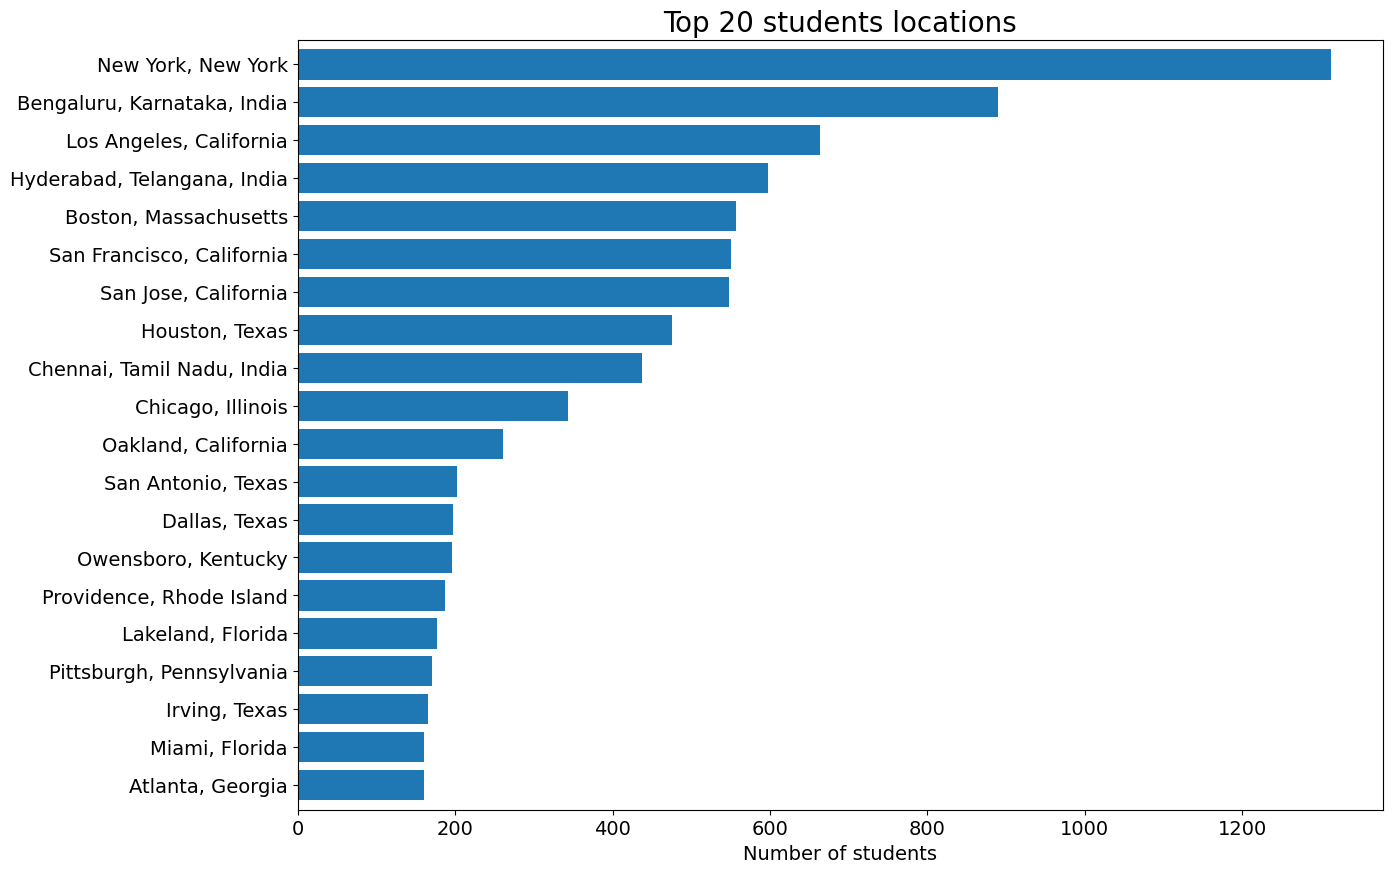

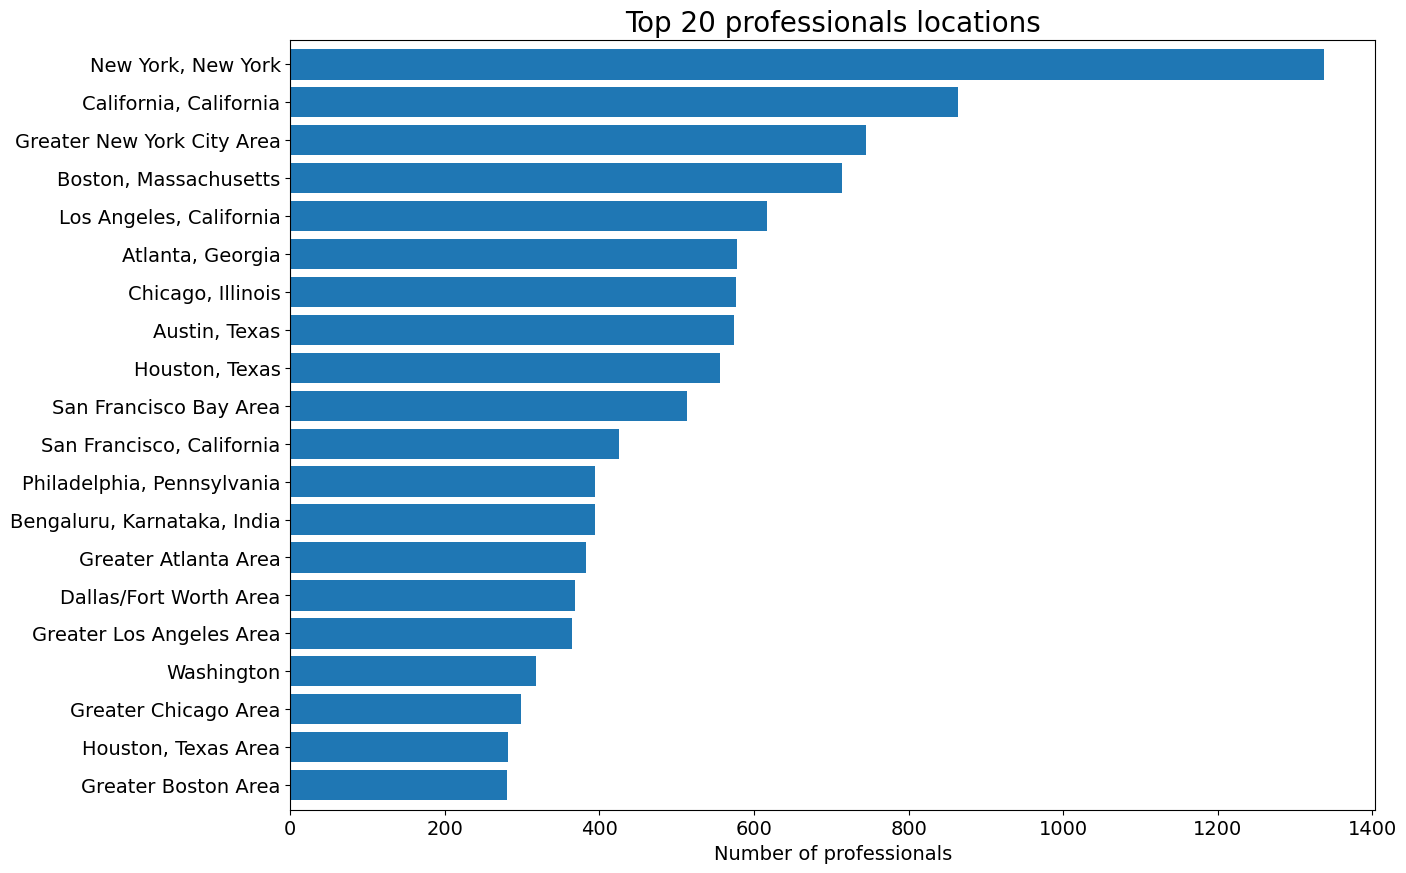

In [13]:
n_locations = 20

users = [
    ('students', students),
    ('professionals', professionals)
]

for user, df in users:
    locations = df['{}_location'.format(user)].value_counts().sort_values(ascending=True).tail(n_locations)

    ax = locations.plot(kind='barh',figsize=(14, 10),width=0.8, fontsize=14)
    ax.set_title('Top %s {} locations'.format(user) % n_locations, fontsize=20)
    ax.set_xlabel('Number of {}'.format(user), fontsize=14)
    for p in ax.patches:
        ax.annotate(str(p.get_width()), (p.get_width(), p.get_y()), color='w', fontsize=14)
    plt.show()

## Growth over time in students and proffesionals

In [16]:
from wordcloud import WordCloud

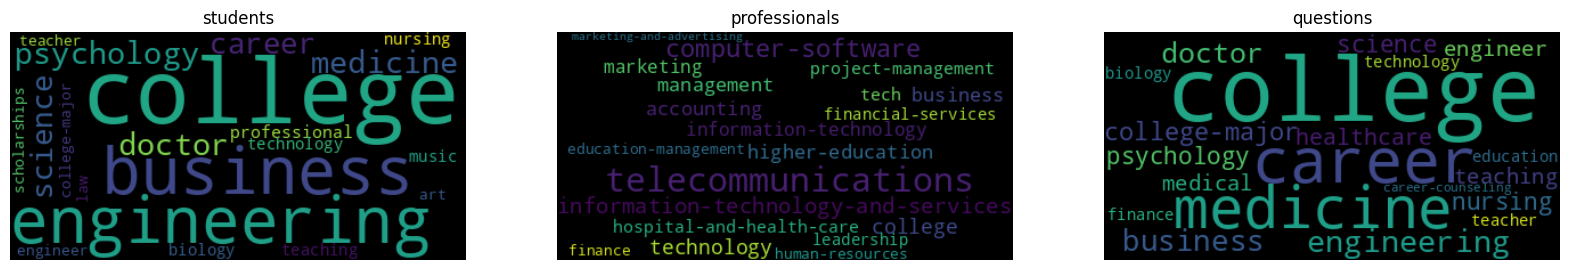

In [17]:
entities = [
    ('students', students),
    ('professionals', professionals),
    ('questions', questions)
]

dfs = []

for entity, df in entities:
    if entity == 'questions':
        df = tag_questions
        df = pd.merge(df, tags, left_on='tag_questions_tag_id', right_on='tags_tag_id')
    else:
        df = tag_users[tag_users['tag_users_user_id'].isin(df['{}_id'.format(entity)])]
        df = pd.merge(df, tags, left_on='tag_users_tag_id', right_on='tags_tag_id')

    df['entity_type'] = entity

    dfs.append(df)


plt_data = pd.concat(dfs)

plt_data = plt_data[['tags_tag_name', 'entity_type']].pivot_table(index='tags_tag_name', columns='entity_type', aggfunc=len, fill_value=0)

for entity, df in entities:
    plt_data[entity] = plt_data[entity] / len(df)

plt_data['sum'] = (plt_data['professionals'] + plt_data['students'] + plt_data['questions'])
plt_data = plt_data.sort_values(by='sum', ascending=False).drop(['sum'], axis=1).head(100)


# Wordcloud
plt.figure(figsize=(20, 20))
wordloud_values = ['students', 'professionals', 'questions']
axisNum = 1
for wordcloud_value in wordloud_values:
    wordcloud = WordCloud(margin=0, max_words=20, random_state=42).generate_from_frequencies(plt_data[wordcloud_value])
    ax = plt.subplot(1, 3, axisNum)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(wordcloud_value)
    plt.axis("off")
    axisNum += 1
plt.show()

## Making a function for merging tables

In [ ]:
def merging(df1, df2, left, right):
    return df1.merge(df2, how="inner", left_on=left, right_on=right)

In [ ]:
# merging que and ans
qa = merging(questions, answers, "questions_id", "answers_question_id")
qa.head(3).T

,0,1,2
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,acccbda28edd4362ab03fb8b6fd2d67b
questions_date_added,2016-04-26 11:14:26 UTC+0000,2016-05-20 16:48:25 UTC+0000,2016-05-20 16:48:25 UTC+0000
questions_title,Teacher career question,I want to become an army officer. What can I d...,I want to become an army officer. What can I d...
questions_body,What is a maths teacher? what is a ma...,I am Priyanka from Bangalore . Now am in 10th ...,I am Priyanka from Bangalore . Now am in 10th ...
answers_id,4e5f01128cae4f6d8fd697cec5dca60c,ada720538c014e9b8a6dceed09385ee3,eaa66ef919bc408ab5296237440e323f
answers_author_id,36ff3b3666df400f956f8335cf53e09e,2aa47af241bf42a4b874c453f0381bd4,cbd8f30613a849bf918aed5c010340be
answers_question_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c
answers_date_added,2016-04-29 19:40:14 UTC+0000,2018-05-01 14:19:08 UTC+0000,2018-05-02 02:41:02 UTC+0000
answers_body,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi. I joined the Army after I attended coll...,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."


In [ ]:
qa['questions_date_added'] = pd.to_datetime(qa['questions_date_added'])
qa['answers_date_added'] = pd.to_datetime(qa['answers_date_added'])
qa['qa_duration'] = (qa['answers_date_added'] - qa['questions_date_added']).dt.days

qa.head().T


,0,1,2,3,4
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff,2f6a9a99d9b24e5baa50d40d0ba50a75
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,acccbda28edd4362ab03fb8b6fd2d67b,f2c179a563024ccc927399ce529094b5,2c30ffba444e40eabb4583b55233a5a4
questions_date_added,2016-04-26 11:14:26+00:00,2016-05-20 16:48:25+00:00,2016-05-20 16:48:25+00:00,2017-02-08 19:13:38+00:00,2017-09-01 14:05:32+00:00
questions_title,Teacher career question,I want to become an army officer. What can I d...,I want to become an army officer. What can I d...,Will going abroad for your first job increase ...,To become a specialist in business management...
questions_body,What is a maths teacher? what is a ma...,I am Priyanka from Bangalore . Now am in 10th ...,I am Priyanka from Bangalore . Now am in 10th ...,I'm planning on going abroad for my first job....,i hear business management is a hard way to ge...
answers_id,4e5f01128cae4f6d8fd697cec5dca60c,ada720538c014e9b8a6dceed09385ee3,eaa66ef919bc408ab5296237440e323f,1a6b3749d391486c9e371fbd1e605014,5229c514000446d582050f89ebd4e184
answers_author_id,36ff3b3666df400f956f8335cf53e09e,2aa47af241bf42a4b874c453f0381bd4,cbd8f30613a849bf918aed5c010340be,7e72a630c303442ba92ff00e8ea451df,17802d94699140b0a0d2995f30c034c6
answers_question_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff,2f6a9a99d9b24e5baa50d40d0ba50a75
answers_date_added,2016-04-29 19:40:14+00:00,2018-05-01 14:19:08+00:00,2018-05-02 02:41:02+00:00,2017-05-10 19:00:47+00:00,2017-10-13 22:07:33+00:00
answers_body,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi. I joined the Army after I attended coll...,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",<p>I work for a global company who values high...,I agree with Denise. Every single job I've had...


In [ ]:
first_qa = qa.groupby('questions_id').head(1)

# let's explore data from last year
start_date = pd.to_datetime('2018-01-01').tz_localize('UTC')
first_qa = first_qa[first_qa['questions_date_added'] >= start_date]

first_qa.loc[(first_qa['qa_duration'] <= 7), 'week'] = 1
first_qa.loc[(first_qa['qa_duration'] > 7) & (first_qa['qa_duration'] <= 14), 'week'] = 2
first_qa.loc[(first_qa['qa_duration'] > 14) & (first_qa['qa_duration'] <= 21), 'week'] = 3
first_qa.loc[(first_qa['qa_duration'] > 21) & (first_qa['qa_duration'] <= 28), 'week'] = 4
first_qa.loc[(first_qa['qa_duration'] > 28), 'week'] = 5


## Exploring questions and answers

In [ ]:
def process_text(df, col):
    df[col] = df[col].str.replace('[^\w\s]','') # replacing punctuations
    df[col] = df[col].str.replace('-',' ') # replacing dashes
    df[col] = df[col].str.replace('\d+','') # replacing digits
    df[col] = df[col].str.lower().str.split() # convert all str to lowercase
    df[col] = df[col].apply(lambda x: [item for item in x if item not in stop]) # remove stopwords
    df[col] = df[col].apply(' '.join) # convert list to str
    return df

In [ ]:
first_qa['questions_body'] = process_text(first_qa, 'questions_body')['questions_body']

fast_resp = pd.Series(first_qa[first_qa['week'] == 1]['questions_body'].tolist()).astype(str)
slow_resp = pd.Series(first_qa[first_qa['week'] == 5]['questions_body'].tolist()).astype(str)

dist_fast = fast_resp.apply(lambda x: len(x.split(' ')))
dist_slow = slow_resp.apply(lambda x: len(x.split(' ')))

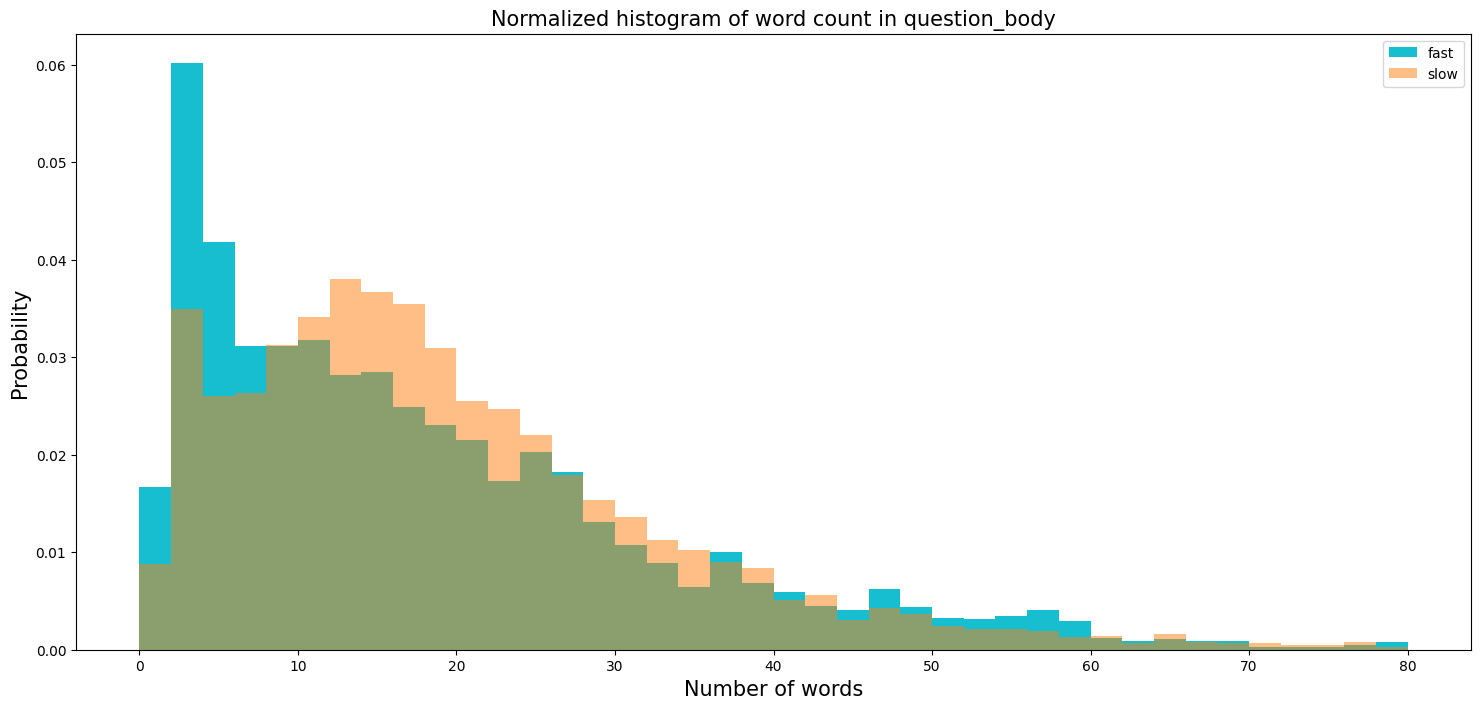

In [ ]:
pal = sns.color_palette()

plt.figure(figsize=(18, 8))
plt.hist(dist_fast, bins=40, range=[0, 80], color=pal[9], density=True, label='fast')
plt.hist(dist_slow, bins=40, range=[0, 80], color=pal[1], alpha=0.5, density=True, label='slow')
plt.title('Normalized histogram of word count in question_body', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()


Longer questions tend to have longer respond time!

(-0.5, 1439.5, 1079.5, -0.5)

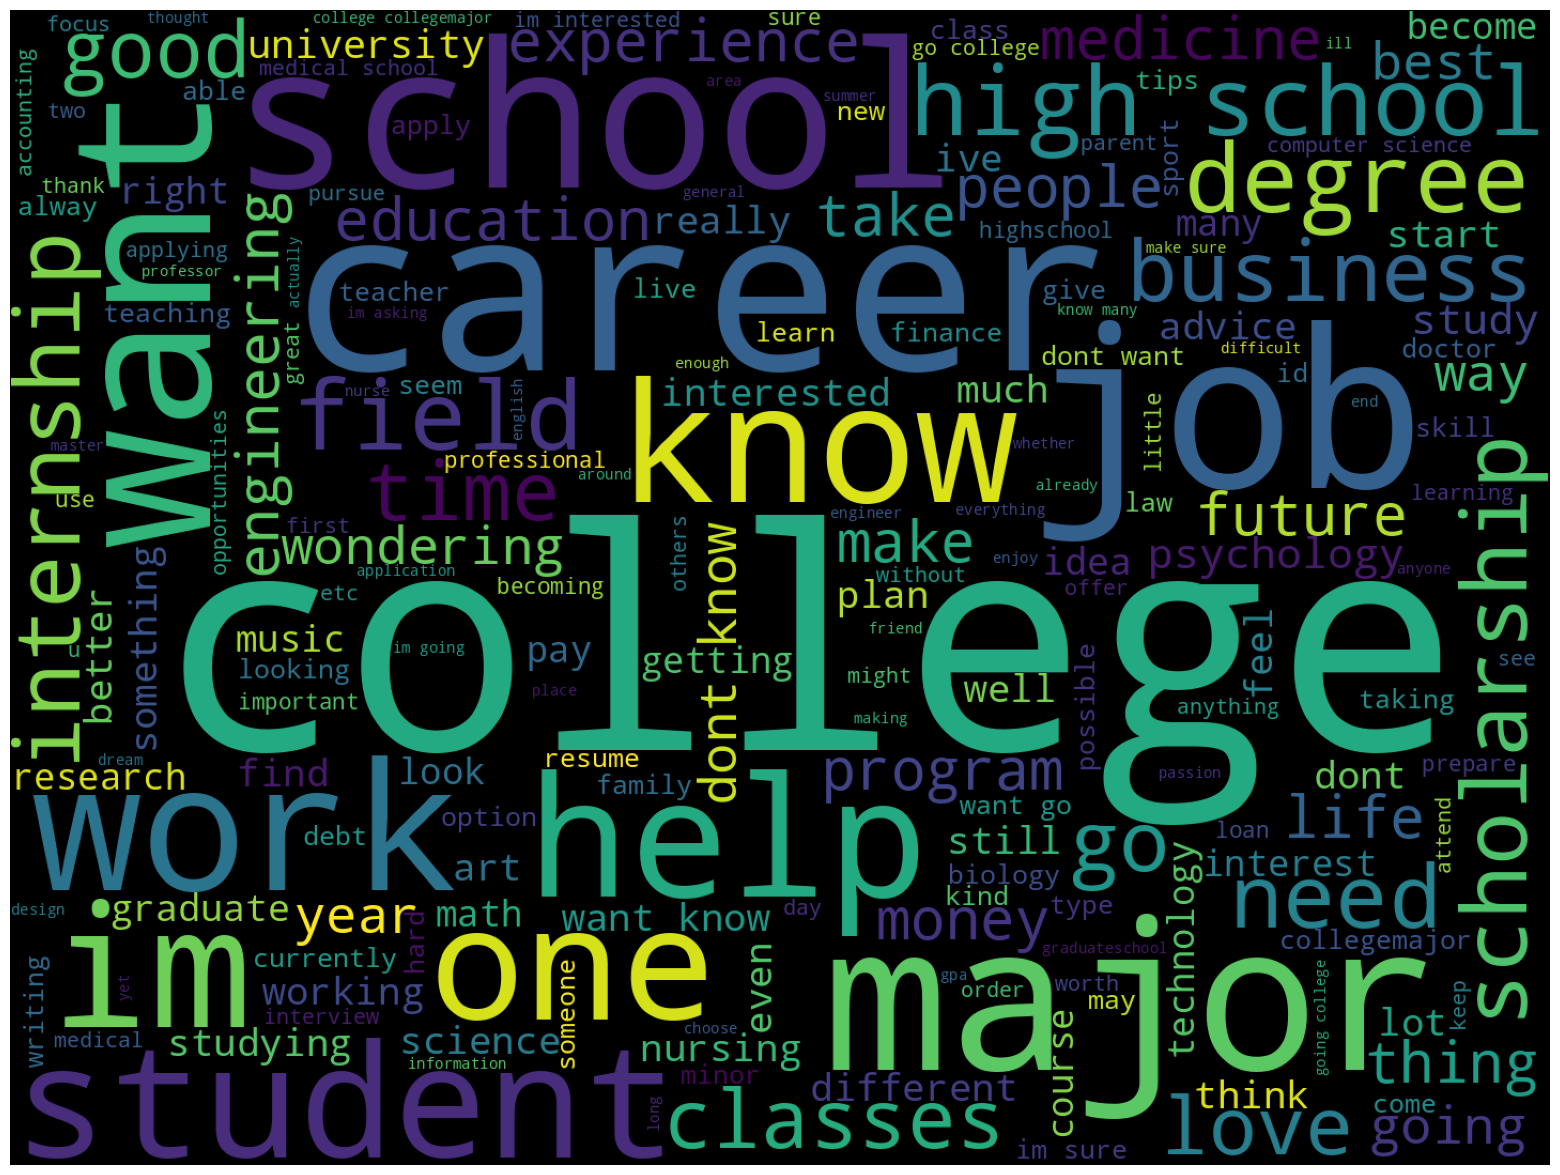

In [ ]:
from wordcloud import WordCloud

all_q = process_text(first_qa, 'questions_body')['questions_body']
cloud = WordCloud(width=1440, height=1080).generate(" ".join(all_q.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine fast and slow responses
all_responses = [str(response) for response in fast_resp + slow_resp]  # Convert to strings and handle NaN

# Initialize the TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',
                     min_df=3,
                     max_df=0.9,
                     stop_words='english')

# Generate a matrix of sentences and a score for each word
tfidf_matrix = tf.fit_transform(all_responses)

# Generate a list of words from the vectorizer
vocab = tf.get_feature_names_out()

# Split the combined TF-IDF matrix back into fast and slow matrices
fast_tfidf_matrix = tfidf_matrix[:len(fast_resp)]
slow_tfidf_matrix = tfidf_matrix[len(fast_resp):]

# Split the vocabulary back into fast and slow vocabularies
fast_vocab = vocab[:len(fast_resp)]
slow_vocab = vocab[len(fast_resp):]


In [ ]:
def word_score_pair(matrix, vocab):
    mat_to_arr = matrix.toarray() # convert the 2d matrix to a 2d array
    word_score = list(map(sum,zip(*mat_to_arr))) # fastest way to sum across all columns
    rank_words_idx = np.argsort(word_score)
    idx_list = rank_words_idx[:10]

    for idx in idx_list:
        print("word: {0}, score: {1:.3f}".format(vocab[idx], word_score[idx]))

In [ ]:
print('fast_vocab\'s words and score:')
word_score_pair(fast_tfidf_matrix, fast_vocab)

fast_vocab's words and score:
word: studentadvice, score: 0.235
word: syllabus, score: 0.335
word: forcing, score: 0.350
word: priority, score: 0.371
word: hated, score: 0.378
word: lifestyles, score: 0.388
word: devoting, score: 0.391
word: perfectly, score: 0.405
word: signed, score: 0.413
word: born, score: 0.413


In [ ]:
print('slow_vocab\'s words and score:')
word_score_pair(slow_tfidf_matrix, slow_vocab)

slow_vocab's words and score:


In [ ]:
state_codes = {'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK',
               'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR',
               'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA',
               'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ',
               'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT',
               'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT',
               'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV',
               'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
               'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND',
               'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY',
               'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
               'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD',
               'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA',
               'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX',
               'Nevada': 'NV', 'Maine': 'ME'}

In [ ]:
students['students_location'] = students['students_location'].fillna('')
students['students_location'] = students['students_location'].str.split(',').str[1]
students['students_location'] = students['students_location'].str.lstrip() # remove first white space

s_val_cnt = students['students_location'].value_counts()
s_val_cnt[:10]

California       4539
Texas            2716
New York         1783
Florida          1478
Massachusetts    1051
Illinois          962
Karnataka         896
Pennsylvania      725
Georgia           722
Tamil Nadu        678
Name: students_location, dtype: int64

In [ ]:
us_states = []

# only get the location if it's in US
for s in s_val_cnt.index.tolist():
    if s in state_codes:
        us_states.append(s)

df = pd.DataFrame({'states': s_val_cnt.index,
                   'count': s_val_cnt.values})

df = df[df['states'].isin(us_states)]
df['states'] = df['states'].apply(lambda x: state_codes[x])

In [ ]:
data = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = df['states'],
        z = df['count'].astype(float),
        locationmode = 'USA-states',
        text = df['states'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "count")
        ) ]

layout = dict(
        title = 'Number of Students by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
qap = merging(qa, professionals, "answers_author_id", "professionals_id")
qap.head(3).T

,0,1,2
questions_id,332a511f1569444485cf7a7a556a5e54,0f1d6a4f276c4a05878dd48e03e52289,0149c6d63e214040b44d4a3789bb00ba
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,585ac233015447cc9e9a217044e515e1,34217a1861d640a58c85e033414cf9cb
questions_date_added,2016-04-26 11:14:26+00:00,2016-05-19 22:16:25+00:00,2018-04-12 17:13:45+00:00
questions_title,Teacher career question,what kind of college could i go to for a soc...,What is the best way to prepare for studying e...
questions_body,What is a maths teacher? what is a ma...,I like soccer because i been playing sense i w...,"I am interested in Computational Neuroscience,..."
answers_id,4e5f01128cae4f6d8fd697cec5dca60c,f3519ab99a1a4a13a8a9ecb814287d2a,825f6e316a5f48328d6f8af831df9940
answers_author_id,36ff3b3666df400f956f8335cf53e09e,36ff3b3666df400f956f8335cf53e09e,36ff3b3666df400f956f8335cf53e09e
answers_question_id,332a511f1569444485cf7a7a556a5e54,0f1d6a4f276c4a05878dd48e03e52289,0149c6d63e214040b44d4a3789bb00ba
answers_date_added,2016-04-29 19:40:14+00:00,2016-07-31 15:35:54+00:00,2018-04-15 23:08:46+00:00
answers_body,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi Rodrigo!</p>\n<p>The important thing to ...,<p>Congratulations on being interested in find...


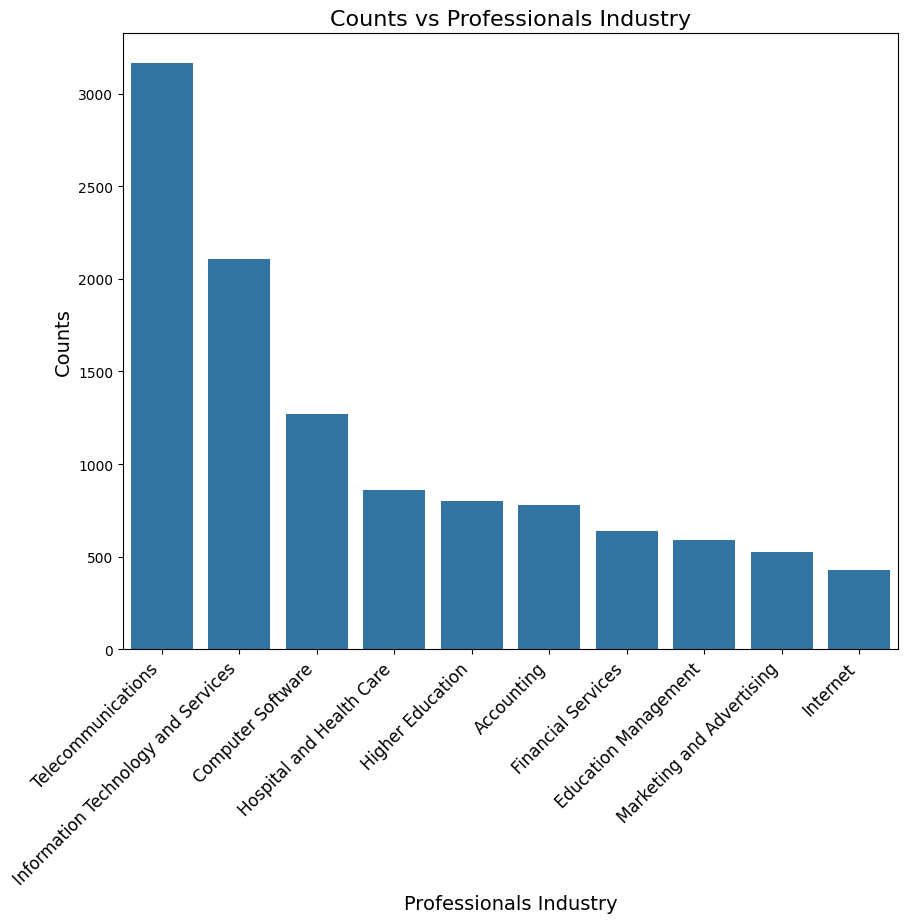

In [ ]:
p_industry_cnt = professionals['professionals_industry'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=p_industry_cnt.index, y=p_industry_cnt.values, order=p_industry_cnt.iloc[:10].index)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel('Professionals Industry', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Counts vs Professionals Industry', fontsize=16)
plt.show()


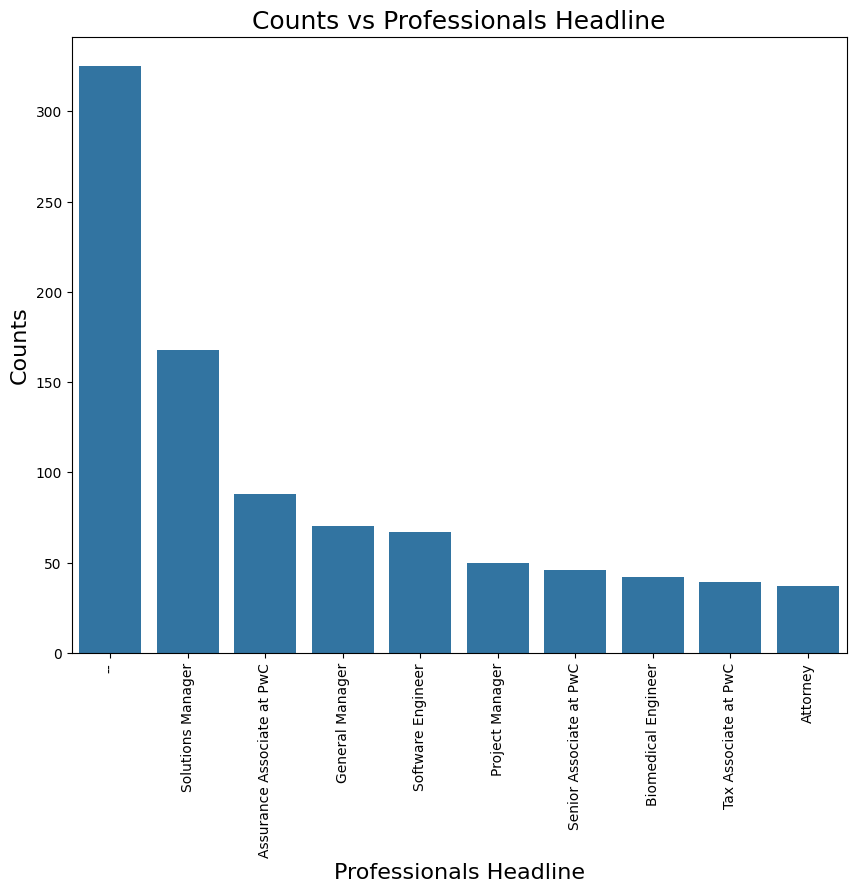

In [ ]:
import numpy as np

# Replace NaN values with a placeholder in the professionals_headline column
professionals['professionals_headline'].fillna('Unknown', inplace=True)

p_cnt = professionals['professionals_headline'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=p_cnt.index, y=p_cnt.values, order=p_cnt.iloc[1:11].index)  # Exclude NaNs

plt.xticks(rotation=90)
plt.xlabel('Professionals Headline', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.title('Counts vs Professionals Headline', fontsize=18)
plt.show()


## Exploring tags

In [ ]:
ttq = merging(tags, tag_questions, "tags_tag_id", "tag_questions_tag_id")
qttq = merging(questions, ttq, "questions_id", "tag_questions_question_id")

In [ ]:
tqq_list = ttq['tag_questions_question_id'].tolist()
questions.shape[0], questions[~questions['questions_id'].isin(tqq_list)].shape[0]

(23931, 643)

In [ ]:

val_cnt = ttq['tags_tag_name'].value_counts()
to_replace = val_cnt[val_cnt <= 5].index.tolist()

print("Top 10 most popular tags:")
print(val_cnt[:10], '\n')
print("Number of unique tags: ", ttq['tags_tag_name'].nunique())
print("Number of tags that occur 5 times and below: ", len(to_replace))

Top 10 most popular tags:
college          3744
career           1566
medicine         1324
engineering      1083
business          989
doctor            946
college-major     783
science           701
nursing           692
psychology        679
Name: tags_tag_name, dtype: int64 

Number of unique tags:  7091
Number of tags that occur 5 times and below:  5659


In [ ]:

top_10_val_cnt = val_cnt[:10]

fig = {
    "data": [
    {
      "values": top_10_val_cnt.values,
      "labels": top_10_val_cnt.index,
      "domain": {"x": [0, .48]},
      "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2']),
      "name": "tag count",
      "hoverinfo":"label+percent+name",
      "hole": .5,
      "type": "pie"
    }],
    "layout": {
      "title":"Tags and Count",
      "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Tags",
                "x": 0.2,
                "y": 0.5
            }]
    }
}

iplot(fig, filename='plot-0')

In [ ]:
def multi_single_tags(df, tag):
    without_tag = df[df['tags_tag_name'] != tag]['tag_questions_question_id'].tolist()
    with_tag = df[df['tags_tag_name'] == tag]['tag_questions_question_id'].tolist()

    only_tag = df[~df['tag_questions_question_id'].isin(without_tag)]['tag_questions_question_id'].tolist()

    multiple_tags = list(set(with_tag) - set(only_tag))

    return multiple_tags, only_tag

In [ ]:
def remove_multiple(df, tag, ids_multiple, ids_single):
    df = df[((df['questions_id'].isin(ids_multiple)) & (df['tags_tag_name'] != tag)) |
             (df['tags_tag_name'] != tag) |
             (df['questions_id'].isin(ids_single))]
    return df

In [ ]:
college_ids_multiple, college_ids_single = multi_single_tags(ttq, "college")

print('Before removing multiple tags containing #college, we have {} questions.'.format(qttq.shape[0]))

qttq = remove_multiple(qttq, "college", college_ids_multiple, college_ids_single)

print('After removing multiple tags containing #college, we are left with {} questions.'.format(qttq.shape[0]))

Before removing multiple tags containing #college, we have 76553 questions.
After removing multiple tags containing #college, we are left with 73033 questions.


In [ ]:
def combine_tags(df):
    grouped = df.groupby('questions_id')['tags_tag_name'].apply(lambda x: "%s" % ', '.join(x))
    df_c = merging(questions, pd.DataFrame(grouped), "questions_id", "questions_id")
    return df_c

In [ ]:
combine_qttq = combine_tags(qttq)
combine_qttq.head().T

,0,1,2,3,4
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff,2f6a9a99d9b24e5baa50d40d0ba50a75,5af8880460c141dbb02971a1a8369529
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,f2c179a563024ccc927399ce529094b5,2c30ffba444e40eabb4583b55233a5a4,aa9eb1a2ab184ebbb00dc01ab663428a
questions_date_added,2016-04-26 11:14:26 UTC+0000,2016-05-20 16:48:25 UTC+0000,2017-02-08 19:13:38 UTC+0000,2017-09-01 14:05:32 UTC+0000,2017-09-01 02:36:54 UTC+0000
questions_title,Teacher career question,I want to become an army officer. What can I d...,Will going abroad for your first job increase ...,To become a specialist in business management...,Are there any scholarships out there for stude...
questions_body,What is a maths teacher? what is a ma...,I am Priyanka from Bangalore . Now am in 10th ...,I'm planning on going abroad for my first job....,i hear business management is a hard way to ge...,I'm trying to find scholarships for first year...
tags_tag_name,"professor, lecture","military, army","working-abroad, overseas","business, networking","scholarships, firstgeneration, highschoolsenior"


In [ ]:
qapttq = merging(answers, combine_qttq, "answers_question_id", "questions_id")
qapttq.head().T

,0,1,2,3,4
answers_id,4e5f01128cae4f6d8fd697cec5dca60c,ada720538c014e9b8a6dceed09385ee3,eaa66ef919bc408ab5296237440e323f,1a6b3749d391486c9e371fbd1e605014,5229c514000446d582050f89ebd4e184
answers_author_id,36ff3b3666df400f956f8335cf53e09e,2aa47af241bf42a4b874c453f0381bd4,cbd8f30613a849bf918aed5c010340be,7e72a630c303442ba92ff00e8ea451df,17802d94699140b0a0d2995f30c034c6
answers_question_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff,2f6a9a99d9b24e5baa50d40d0ba50a75
answers_date_added,2016-04-29 19:40:14 UTC+0000,2018-05-01 14:19:08 UTC+0000,2018-05-02 02:41:02 UTC+0000,2017-05-10 19:00:47 UTC+0000,2017-10-13 22:07:33 UTC+0000
answers_body,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi. I joined the Army after I attended coll...,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",<p>I work for a global company who values high...,I agree with Denise. Every single job I've had...
questions_id,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c,4ec31632938a40b98909416bdd0decff,2f6a9a99d9b24e5baa50d40d0ba50a75
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,acccbda28edd4362ab03fb8b6fd2d67b,f2c179a563024ccc927399ce529094b5,2c30ffba444e40eabb4583b55233a5a4
questions_date_added,2016-04-26 11:14:26 UTC+0000,2016-05-20 16:48:25 UTC+0000,2016-05-20 16:48:25 UTC+0000,2017-02-08 19:13:38 UTC+0000,2017-09-01 14:05:32 UTC+0000
questions_title,Teacher career question,I want to become an army officer. What can I d...,I want to become an army officer. What can I d...,Will going abroad for your first job increase ...,To become a specialist in business management...
questions_body,What is a maths teacher? what is a ma...,I am Priyanka from Bangalore . Now am in 10th ...,I am Priyanka from Bangalore . Now am in 10th ...,I'm planning on going abroad for my first job....,i hear business management is a hard way to ge...


In [ ]:
noise = ['school','would','like', 'want', 'dont',
         'become','sure','go', 'get', 'college',
         'career', 'wanted', 'im', 'ing', 'ive',
         'know', 'high', 'becom', 'job', 'best',
         'day', 'hi', 'name', 'help', 'people',
         'year', 'years', 'next', 'interested',
         'question', 'questions', 'take', 'even',
         'though', 'please', 'tell']

In [ ]:
def another_process_text(df, col):
    df[col] = df[col].str.replace('[^\w\s]','') # replacing punctuations
    df[col] = df[col].str.replace('-',' ') # replacing dashes
    df[col] = df[col].str.replace('\d+','') # replacing digits
    df[col] = df[col].str.lower().str.split() # convert all str to lowercase
    df[col] = df[col].apply(lambda x: [item for item in x if item not in stop]) # remove stopwords
    df[col] = df[col].apply(lambda x: [item for item in x if item not in noise])
    df[col] = df[col].apply(' '.join) # convert list to str
    return df

def generate_ngrams(text, N):
    grams = [text[i:i+N] for i in range(len(text)-N+1)]
    grams = [" ".join(b) for b in grams]
    return grams

In [ ]:
df = another_process_text(questions, 'questions_body')
df['bigrams'] = df['questions_body'].apply(lambda x : generate_ngrams(x.split(), 2))

In [ ]:
all_bigrams = []

for each in df['bigrams']:
    all_bigrams.extend(each)

t1 = Counter(all_bigrams).most_common(20)
x1 = [a[0] for a in t1]
y1 = [a[1] for a in t1]

[Text(0, 0.5, 'Most frequent bigrams'), Text(0.5, 0, 'Frequency')]

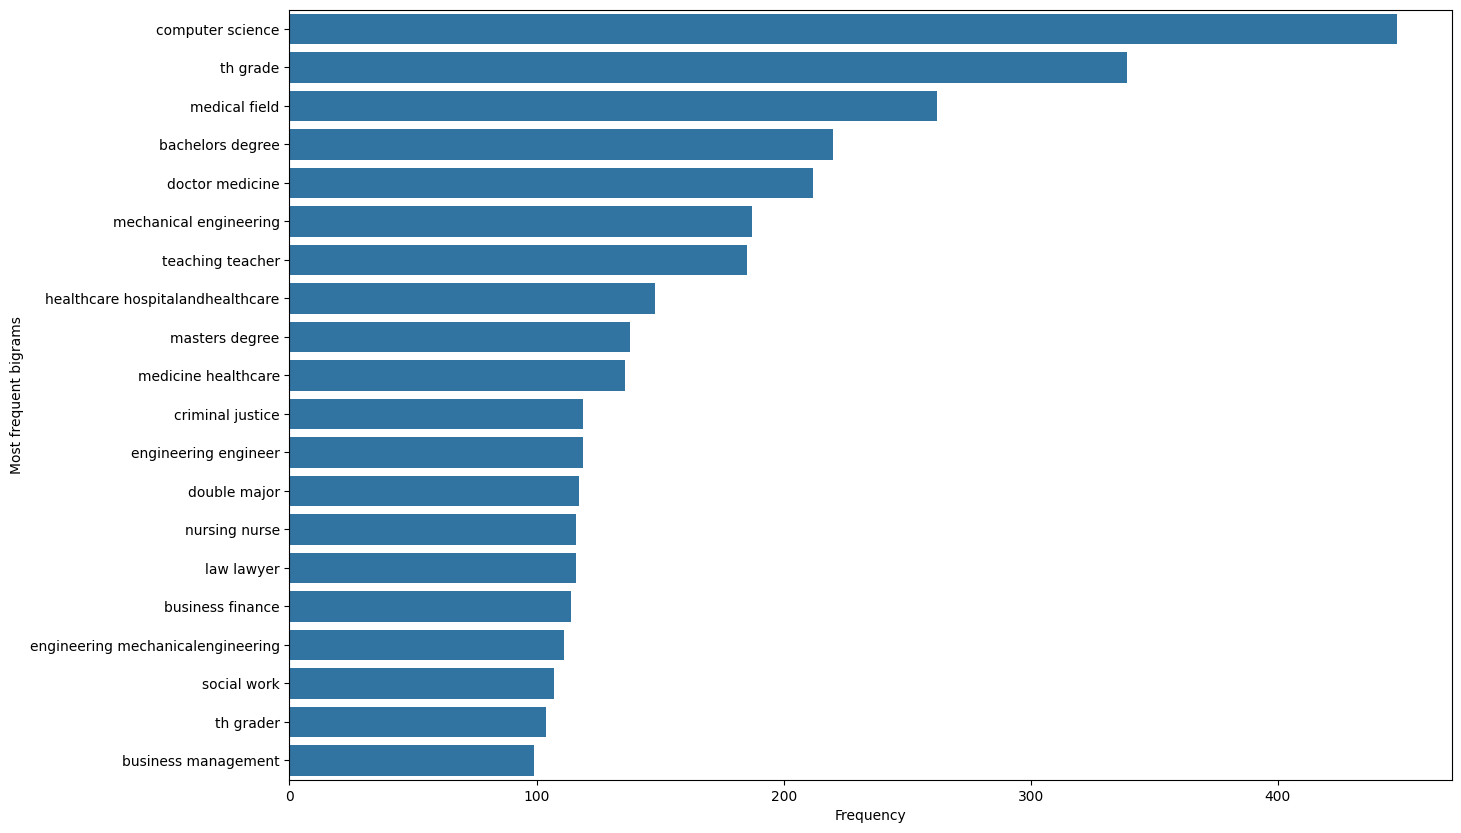

In [ ]:
fig, axes = plt.subplots(figsize=(15,10))

bar = sns.barplot(y=x1, x=y1)
bar.set(ylabel='Most frequent bigrams', xlabel='Frequency')